Final Project Submission
Please fill out:
* Student name: Claudia Tsai
* Student pace: self paced
* Scheduled project review date/time: 2/17/2022 11:00AM
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# King County Market Report

## Business Overview

 - Does season affect house price ?
 - Which season has more choices of houses?
 - What features affect property value the most? 

## King County House Sales Dataset 
 - 21,597 house records.
 - 20 different features.
 - From May 2014 to May 2015

# Obtaining the Data

## Import necessary libraries

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from scipy import stats


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter

## Obtain Data

In [367]:
df = pd.read_csv('data/kc_house_data.csv')

- Check the data types and non-null count in the dataset.
- Get to know what variables in the dataset.

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

A note after reviewing the data types in the dataset:<br>
 - The data type of "date"  and "sqft_basement" is object, which should be datetime and integer. Will take a closer look and see if both columns need to drop or to change.<br>
 - Variables waterfront, view, condition, and grade are in Object data type. Will also work on those variables.

In [369]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,NONE,...,7 Average,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,NO,NONE,...,7 Average,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,NO,NONE,...,7 Average,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,NO,NONE,...,8 Good,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


Get the description of columns in the dataset.

In [370]:
columns = open("data/column_names.md", "r")
test= pd.DataFrame(columns)
test
#print(columns.read())
#columns.close()

,0
0,# Column Names and Descriptions for King Count...
1,* `id` - Unique identifier for a house\n
2,* `date` - Date house was sold\n
3,* `price` - Sale price (prediction target)\n
4,* `bedrooms` - Number of bedrooms\n
5,* `bathrooms` - Number of bathrooms\n
6,* `sqft_living` - Square footage of living spa...
7,* `sqft_lot` - Square footage of the lot\n
8,* `floors` - Number of floors (levels) in house\n
9,* `waterfront` - Whether the house is on a wat...


Change the float_format of pandas in pandas set_option

In [371]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [372]:
def millions(tick_val,pos):
    """adapted from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html"""
    val = round(tick_val/1000000, 1)
    new_tick_format = '${:.0f}M'.format(val)
    return new_tick_format
form = FuncFormatter(millions)

# Scrubbing and Cleaning Data

Display summary statistics for the dataset.

In [373]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


After viewing above data description, the maximum number of bedrooms is 33, which is not common. Need to see if any odd number in the data set.

In [374]:
df.loc[df['bedrooms']>10]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.000,11,3.000,3000,4960,2.000,NO,NONE,...,7 Average,2400,600.0,1918,1999.000,98106,47.556,-122.363,1420,4960
15856,2402100895,6/25/2014,640000.000,33,1.750,1620,6000,1.000,NO,NONE,...,7 Average,1040,580.0,1947,0.000,98103,47.688,-122.331,1330,4700


- There are two houses with 11 bedrooms and 33 bedrooms.
- If look at the sqft_living and price of both houses, the bedroom numbers look like typo.
So both bedroom numbers were replaced to 3.

In [375]:
# If look at the bedrooms and sqft_living, the houses with bedroom 11 and 33 look like typo.
# The bedrooms number with be replaced to 3.
df['bedrooms']=df['bedrooms'].replace([11,33],3)

Check the column again and make sure the replace works.

In [376]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 10])

## Detecting and Dealing with Null Values

Try to find if any null values in the dataset.

In [377]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fill null value in "view" colum 

In [378]:
# Look at column "view"
df.view.value_counts(normalize= True)

NONE        0.902
AVERAGE     0.044
GOOD        0.024
FAIR        0.015
EXCELLENT   0.015
Name: view, dtype: float64

In [379]:
# fill the null value with 'NONE'
df.view = df.view.fillna('NONE')
df.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

### Fill null value in "waterfront" column 

In [380]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [381]:
# fill the null value with 'NO'
df.waterfront = df.waterfront.fillna('NO')

In [382]:
df.waterfront.unique()

array(['NO', 'YES'], dtype=object)

### Fill null value in "yr_renovated" column

In [383]:
# Look at column "yr_renovated"
print(sorted(df.yr_renovated.unique()))

[0.0, 1945.0, 1954.0, 1970.0, 1971.0, 1980.0, 1991.0, nan, 1934.0, 1940.0, 1944.0, 1946.0, 1948.0, 1950.0, 1951.0, 1953.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1962.0, 1963.0, 1964.0, 1965.0, 1967.0, 1968.0, 1969.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


In [384]:
# fill null values in yr_renovvated with 0
df.yr_renovated = df.yr_renovated.fillna(0)

In [385]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [386]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

### Dealing with Data Type

In [387]:
# Look into sqft_basement since the data type is object.
df.sqft_basement.value_counts(normalize = True)

0.0      0.594
?        0.021
600.0    0.010
500.0    0.010
700.0    0.010
          ... 
1920.0   0.000
3480.0   0.000
2730.0   0.000
2720.0   0.000
248.0    0.000
Name: sqft_basement, Length: 304, dtype: float64

In [388]:
# From the above, 59% houses in this data set has 0 sqft_basement information.
# Since "?" count as 0.021 in this column, it'd better not to drop ? from the data set at this moment.
# Two thing I would do here.
# First is to calculate the sqft_basement by subtracting sqft_above from sqft_living.
df['cal_sqft_basement'] = df['sqft_living'] - df['sqft_above']    

# Second is to convert sqft_basement as "Yes" or "No", which is 1 or 0, which makes it like categorical.
df['cal_sqft_basement'] = df['cal_sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

# Test if the converting data to categorical data works.
df['cal_sqft_basement'].unique()

array([0, 1])

In [389]:
df['cal_sqft_basement'].value_counts()

0    13110
1     8487
Name: cal_sqft_basement, dtype: int64

In [390]:
# Column "waterfront" data type is object.
# Convert it into data type integer.
df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x =='YES' else 0)
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [391]:
# Convert column "view" data type from object to integer
df['view']= df['view'].apply(lambda x:0 if x=='NONE'
                                                  else (1 if x=='FAIR'
                                                  else (2 if x=='AVERAGE'
                                                  else (3 if x=='GOOD'
                                                  else (4)))))
df['view'].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

In [392]:
# Convert column "condition" data type from object to integer
df['condition'] = df['condition'].apply(lambda x:0 if x=='Poor'
                                                  else (1 if x=='Fair'
                                                  else (2 if x=='Average'
                                                  else (3 if x=='Good'
                                                  else (4)))))
df['condition'].value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

In [393]:
df['grade'] = df['grade'].astype(str).str[:2].astype(int)
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

## Add a few columns for EDA

In [394]:
# Convert the release_date columns type to datetime.
df['date'] = pd.to_datetime(df['date'])
df['date'].min()

Timestamp('2014-05-02 00:00:00')

In [395]:
# Created new columns of year and month in order to analyze the data by months or seasons.
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cal_sqft_basement,year_sold,month_sold
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,1955,0.000,98178,47.511,-122.257,1340,5650,0,2014,10
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,...,1951,1991.000,98125,47.721,-122.319,1690,7639,1,2014,12
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,...,1933,0.000,98028,47.738,-122.233,2720,8062,0,2015,2
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,...,1965,0.000,98136,47.521,-122.393,1360,5000,1,2014,12
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,...,1987,0.000,98074,47.617,-122.045,1800,7503,0,2015,2


In [396]:
# Creating a new column to sort the houses sold in seasons
df['seasons'] = df['month_sold'].apply(lambda x : 'Summer' if x > 5 and x < 9
                                                     else ('Spring' if x >= 3 and x < 6
                                                     else('Winter' if x >11 or x < 3
                                                     else('Fall'))))

In [397]:
# Double check if the function works
df.loc[0:5,['month_sold','seasons']]

,month_sold,seasons
0,10,Fall
1,12,Winter
2,2,Winter
3,12,Winter
4,2,Winter
5,5,Spring


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21597 non-null  int64         
 1   date               21597 non-null  datetime64[ns]
 2   price              21597 non-null  float64       
 3   bedrooms           21597 non-null  int64         
 4   bathrooms          21597 non-null  float64       
 5   sqft_living        21597 non-null  int64         
 6   sqft_lot           21597 non-null  int64         
 7   floors             21597 non-null  float64       
 8   waterfront         21597 non-null  int64         
 9   view               21597 non-null  int64         
 10  condition          21597 non-null  int64         
 11  grade              21597 non-null  int64         
 12  sqft_above         21597 non-null  int64         
 13  sqft_basement      21597 non-null  object        
 14  yr_bui

## Checking for Multicollinearity

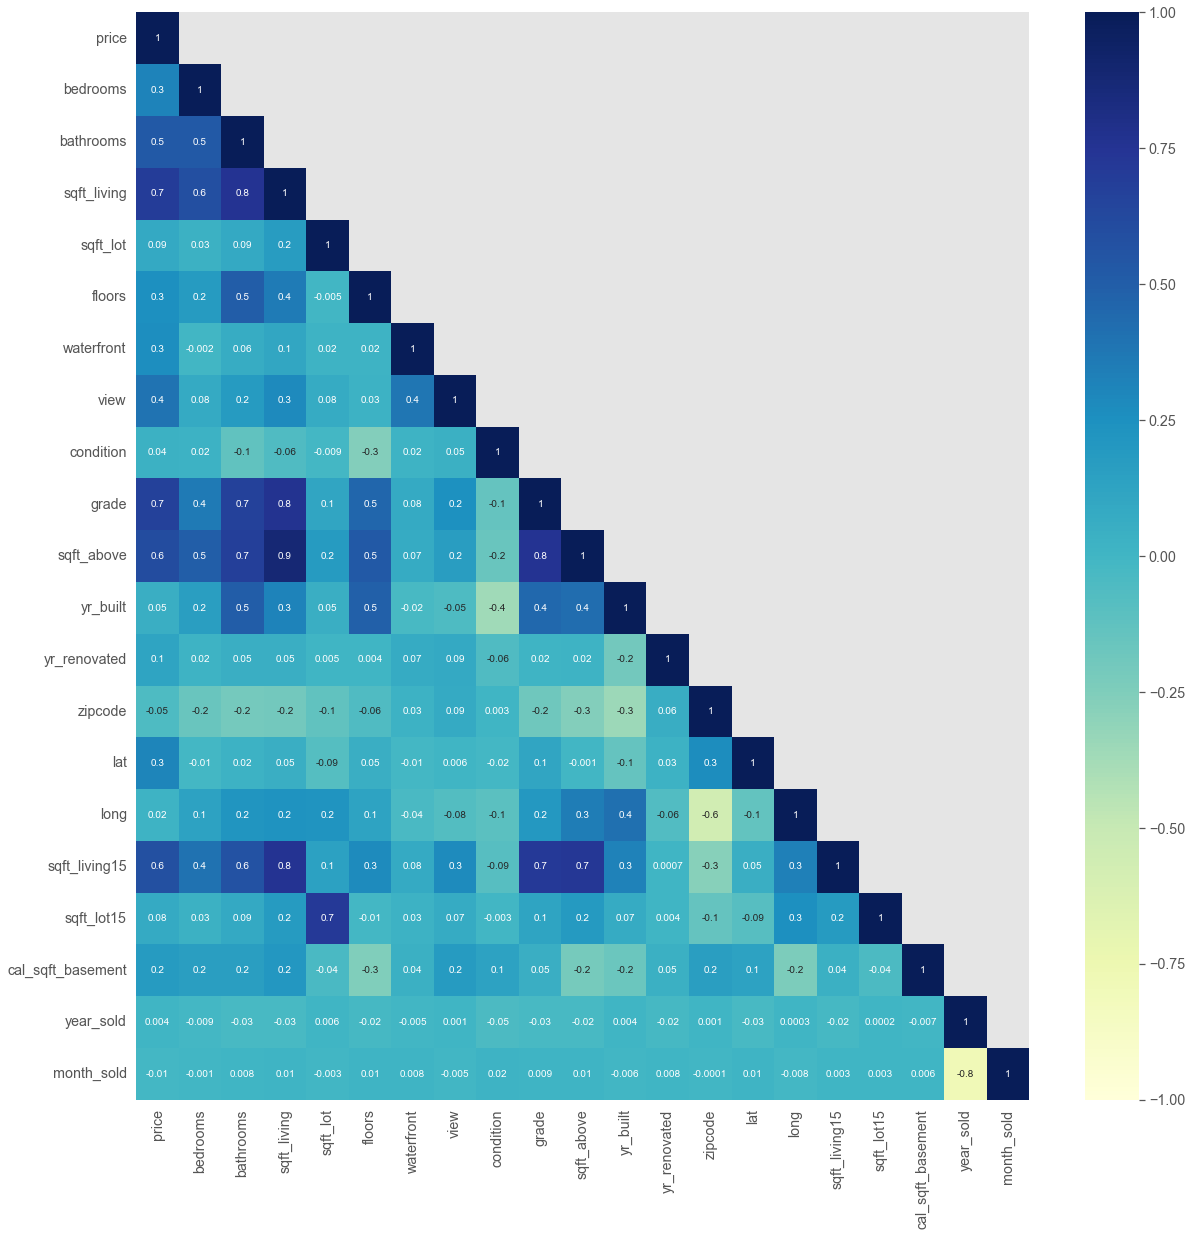

In [399]:
'''showed the lower triangular heatmap
https://datavizpyr.com/how-to-make-lower-triangular-heatmap-with-python/
'''
corr = df.drop(columns = "id").corr()
corr_tri = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(data = corr_tri, center = 0, cmap = "YlGnBu", annot = True, fmt='.1g',vmin=-1);

- As we can see from the above heatmap, the price has more than 0.5 correlation with sqft_above,sqft_living, sqft_living15, and grade.
- sqft_living includes basement sqft. In this case, I would keep sqft_living and drop sqft_above since they are highly correlating.
- A Realtor often replies with the phrase, "location, location, location."  Where a home is located is the most important factor in it's value. Since location is the only factor that couldn't be changed, we will look into zipcode in the dataset later.

## Select the variables to create a dataframe containing continuous data

In [400]:
cont= ['price','sqft_living']
df_cont = df.loc[:,cont]
df_cont.head()

,price,sqft_living
0,221900.000,1180
1,538000.000,2570
2,180000.000,770
3,604000.000,1960
4,510000.000,1680


Check continuous data if follow a normal distribution.

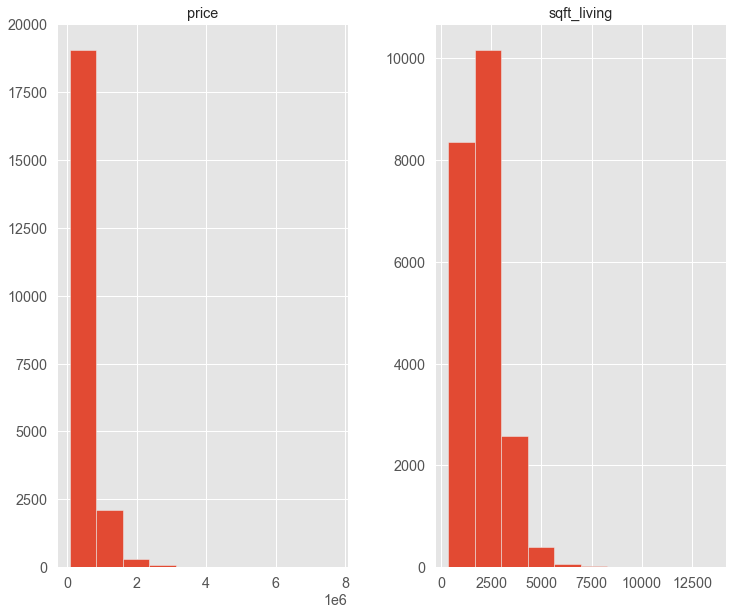

In [401]:
df_cont.hist(figsize=(12,10));

# Exploring the Data

## Find out the price distribution

Text(0.5, 1.0, 'Housing Prices Distribution in King County')

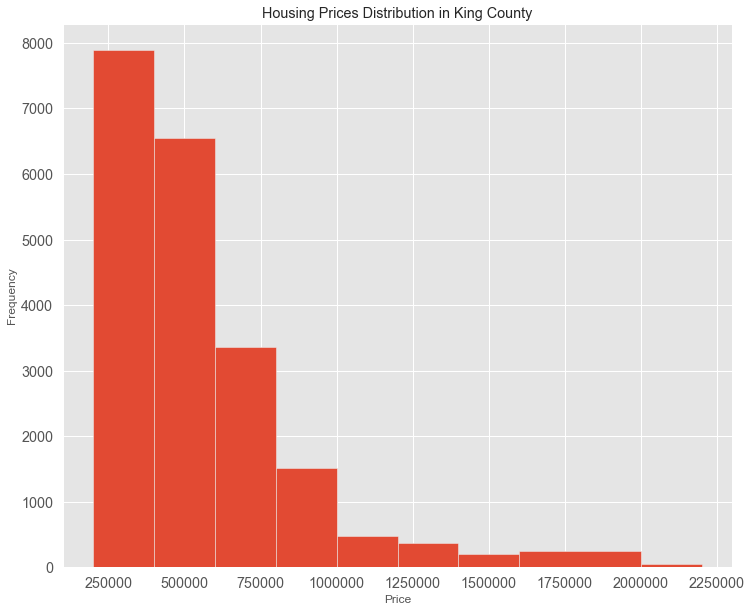

In [402]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
bins_list = [200000,400000,600000,800000,1000000,1200000,1400000,1600000,2000000,2200000]
ax=df.price.hist(bins=bins_list,figsize=(12,10))
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")
#ax.xaxis.set_major_formatter(form)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_title("Housing Prices Distribution in King County")


## Find out the average price by zipcode

In [403]:
df_price=df.groupby('zipcode')['price'].mean()

In [404]:
df_price.head()

zipcode
98001    281194.870
98002    234284.035
98003    294111.279
98004   1356523.991
98005    810289.696
Name: price, dtype: float64

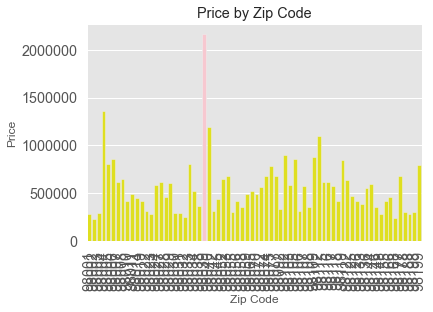

In [405]:
#sns.set(rc={'figure.figsize':(12,7)})
clrs=['yellow' if (value < max(df_price.values)) else 'pink' for value in df_price.values]
ax=sns.barplot(data=df,x='zipcode',y='price',palette=clrs,ci= None)
ax.set_xlabel('Zip Code')
ax.set_ylabel('Price')
ax.set_title('Price by Zip Code')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Zip 98039 (Madina, WA) has the highest average sold price in King County.

### Find out top 10 average price by zipcode

In [406]:
df_price_sort=df.groupby('zipcode')['price'].mean().sort_values(ascending= False)

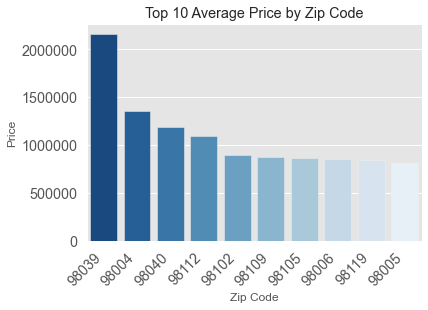

In [407]:
ax=sns.barplot(data=df,order= df_price_sort.index[:10],x='zipcode',y='price',palette='Blues_r',ci=None)
ax.set_ylabel('Price')
ax.set_xlabel('Zip Code')
ax.set_title('Top 10 Average Price by Zip Code')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right");

## Find out the average price by season

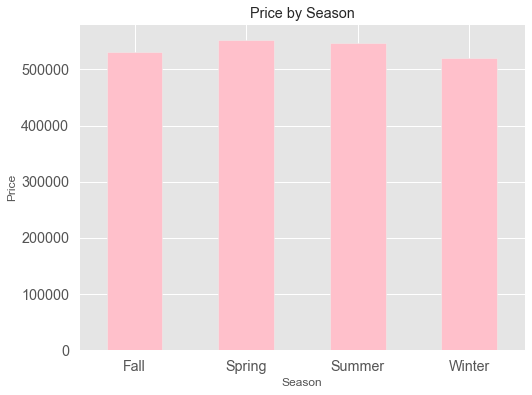

In [408]:
fig,ax=plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
df.groupby('seasons')['price'].mean().plot(kind='bar',color='pink')
ax.set_ylabel('Price')
ax.set_xlabel('Season')
ax.set_title('Price by Season')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Spring and Summer has higher average sold price than Fall and Winter.

## Find out the number of houses sold by seasons

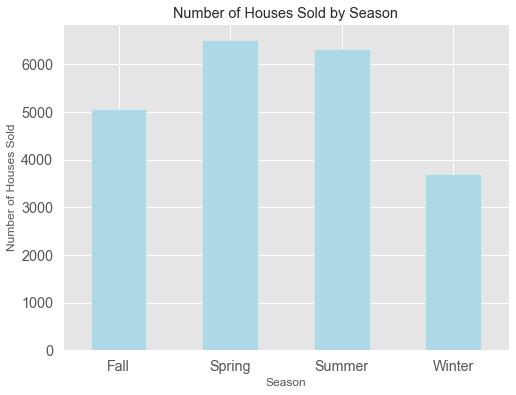

In [409]:
fig,ax=plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
df.groupby('seasons')['id'].count().plot(kind='bar',color='lightblue')
ax.set_ylabel('Number of Houses Sold')
ax.set_xlabel('Season')
ax.set_title('Number of Houses Sold by Season')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

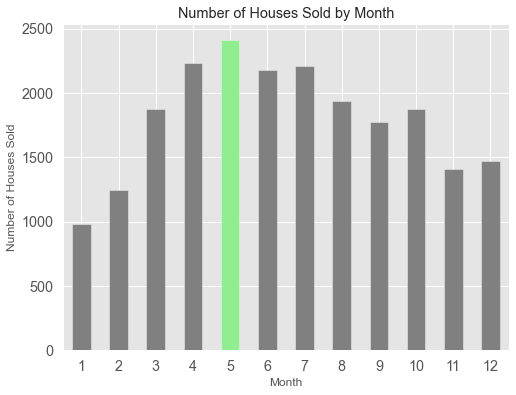

In [410]:
fig,ax=plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
house_count= df.groupby('month_sold')['id'].count()
clrs=['grey' if (value < max(house_count.values)) else 'lightgreen' for value in house_count.values]
house_count.plot(kind='bar',color=clrs)

ax.set_ylabel('Number of Houses Sold')
ax.set_xlabel('Month')
ax.set_title('Number of Houses Sold by Month')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

 - Spring is the season with most houses sold and then Summer.
 - Winter is the season with least houses sold.

## Find out the average price by grade

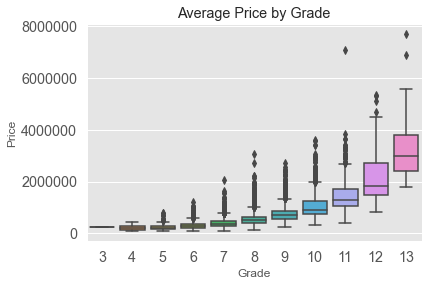

In [411]:
ax=sns.boxplot(x="grade",y='price',data=df)
#sns.despine(offset =10,trim= True)
ax.set_xlabel("Grade")
ax.set_ylabel("Price")
ax.set_title("Average Price by Grade")
#ax.yaxis.set_major_formatter(form)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

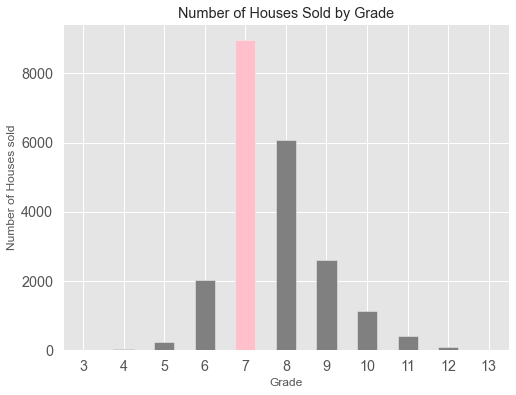

In [412]:
fig,ax=plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
grade_count= df.groupby('grade')['id'].count()
clrs=['grey' if (value < max(grade_count.values)) else 'pink' for value in grade_count.values]
grade_count.plot(kind='bar',color=clrs)

ax.set_ylabel('Number of Houses sold')
ax.set_xlabel('Grade')
ax.set_title('Number of Houses Sold by Grade')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

## Find out the average price by waterfront

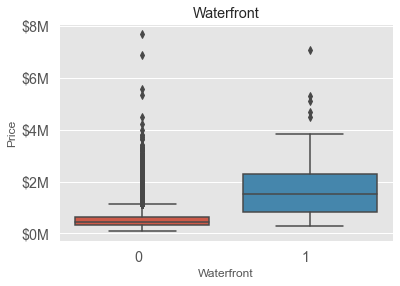

In [413]:
ax=sns.boxplot(x="waterfront",y='price',data=df)

ax.set_ylabel('Price')
ax.set_xlabel('Waterfront')
ax.set_title('Waterfront')
ax.yaxis.set_major_formatter(form)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,ha="right");

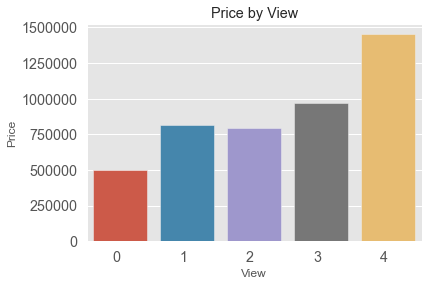

In [414]:
ax=sns.barplot(x="view",y='price',data=df,ci=None)

ax.set_ylabel('Price')
ax.set_xlabel('View')
ax.set_title('Price by View')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#ax.yaxis.set_major_formatter(form)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,ha="right");

## Show the price distribution by location

Show the location of sold houses in grades.

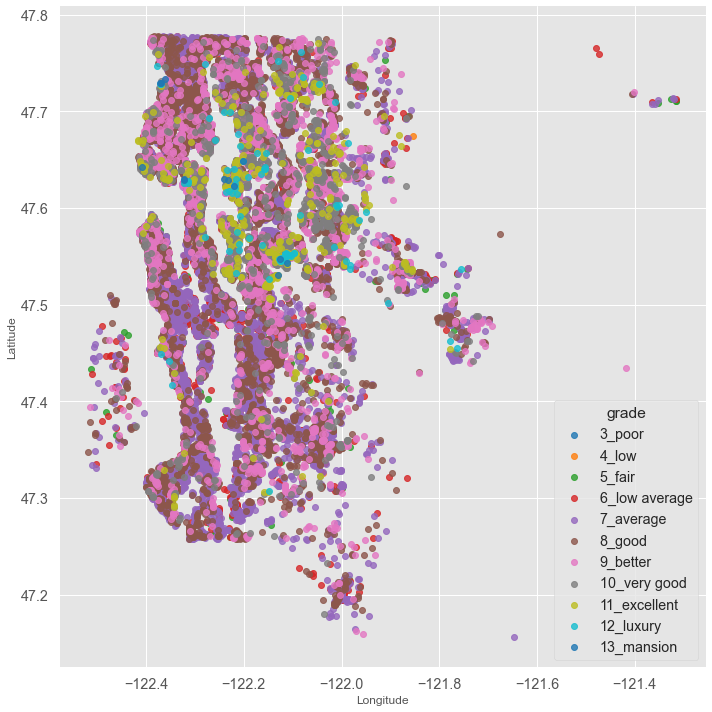

In [415]:
sns.lmplot(y = "lat", x = "long", hue = "grade", data = df, fit_reg = False, height = 10, legend = False, palette = "tab10")
plt.legend(title='grade', loc='lower right', labels=['3_poor', '4_low','5_fair','6_low average','7_average','8_good','9_better','10_very good','11_excellent','12_luxury','13_mansion'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Show the location of sold houses and price by utilizing latitude and longitude provided in the dataset.

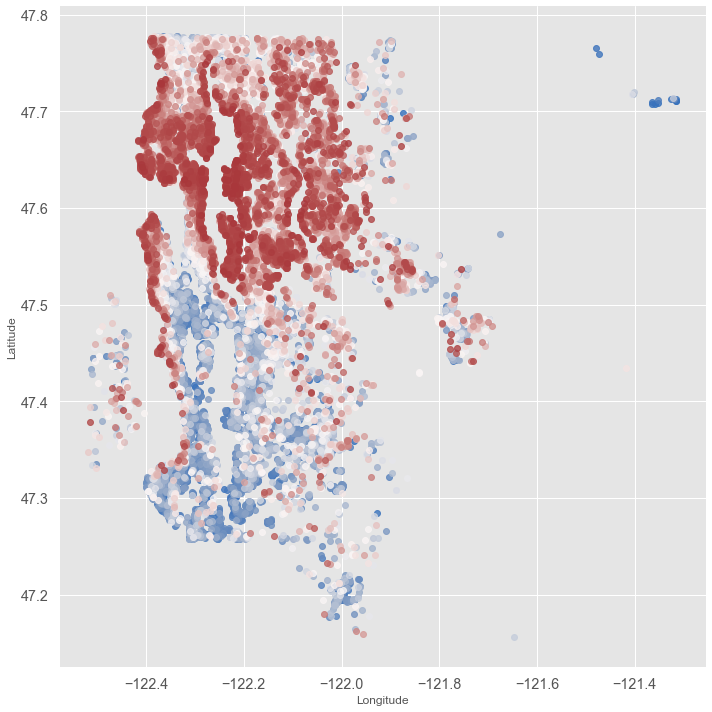

In [416]:
# Color description : light blue - lowest price to dark red -highest price
sns.lmplot(y = "lat", x = "long", hue = "price", data = df, fit_reg = False, height = 10, legend = False, palette = "vlag")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Check for Linearity

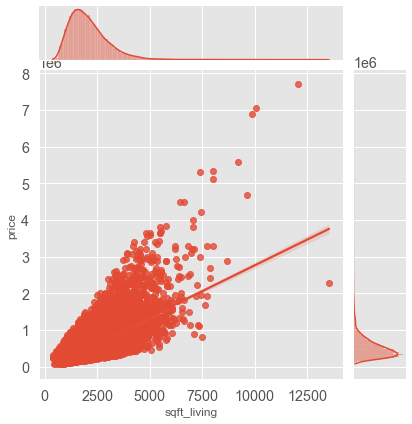

In [417]:
for col in df_cont.columns[1:]:
    sns.jointplot(col,'price',data=df_cont,kind='reg');

From above visualizations, the columns 'sqft_living', 'bathrooms' and 'sqft_living15' has linear relationship with 'price'. Grades are more like categorical variables but also show linear relationship with price.

# Modeling the Data

## Baseline Model

Use variables sqft_living, sqft_living15 and grade to create baseline model

In [418]:
outcome = 'price'
predictors = df_cont.drop('price',axis = 1)
pred_sum='+'.join(predictors.columns)

formula = outcome + '~' + pred_sum
model_a = smf.ols(data = df_cont, formula = formula).fit()

model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:25:41   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A note for above table:
- Sqft-living has the highes coefficient. There is no variables with p-value higher than 0.05.
- R-Squared value is 0.535. 
- Continue to check the Normality and Homoscedasticity Assumptions.


### Check the Normality Assumption

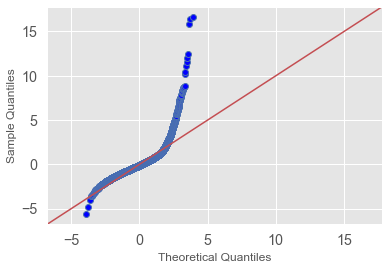

In [419]:
fig = sm.graphics.qqplot(model_a.resid, dist=stats.norm, line='45', fit=True)

### Check Homoscedasticity Assumption

In [420]:
col_a = list(predictors.columns)
col_a

['sqft_living']

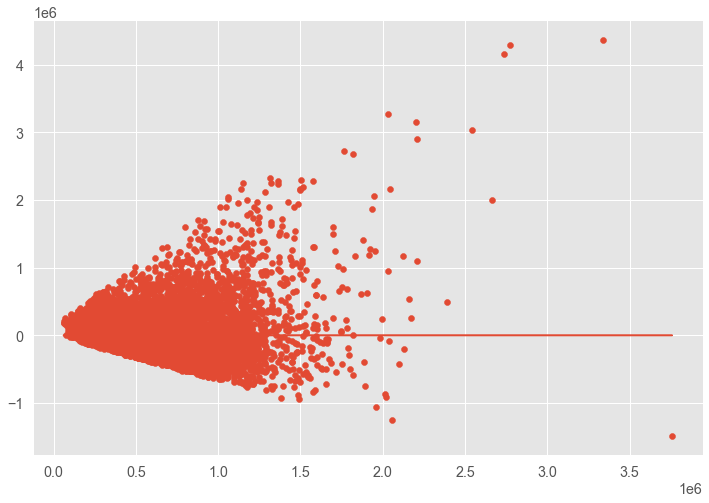

In [421]:
#Visualizing the errors
plt.figure(figsize=(12,8))
plt.scatter(model_a.predict(df_cont[col_a]), model_a.resid)
plt.plot(model_a.predict(df_cont[col_a]), [0 for i in range(len(df_cont))])

## Adding categorical variables for modeling

In [423]:
#Convert categorial variables,'seasons' and 'waterfront' to utilize them as predictors of price.
season_dummies = pd.get_dummies(df['seasons'],prefix='season',drop_first=True)
waterfront_dummies = pd.get_dummies(df['waterfront'],prefix='waterfront',drop_first=True)
condition_dummies = pd.get_dummies(df['condition'],prefix='condition',drop_first=True)
view_dummies = pd.get_dummies(df['view'],prefix='view',drop_first=True)
bdr_dummies = pd.get_dummies(df['bedrooms'],prefix='bedroom',drop_first=True)
bath_dummies = pd.get_dummies(df['bathrooms'],prefix='bathroom',drop_first=True)
bath_dummies.columns = bath_dummies.columns.str.replace('.','_')
grade_dummies = pd.get_dummies(df['grade'],prefix='grade',drop_first=True)

Check the dataframe to see what it looks like.

In [424]:
df_b= pd.concat([df_cont,season_dummies,waterfront_dummies,condition_dummies,view_dummies,bdr_dummies,bath_dummies,grade_dummies],axis =1)
df_b.tail()

,price,sqft_living,season_Spring,season_Summer,season_Winter,waterfront_1,condition_1,condition_2,condition_3,condition_4,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
21592,360000.000,1530,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
21593,400000.000,2310,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
21594,402101.000,1020,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
21595,400000.000,1600,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
21596,325000.000,1020,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [425]:
outcome = 'price'
predictors = df_b.drop('price',axis = 1)
pred_sum='+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_b = smf.ols(data = df_b, formula = formula).fit()

model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     705.3
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:27:39   Log-Likelihood:            -2.9565e+05
No. Observations:               21597   AIC:                         5.914e+05
Df Residuals:                   21536   BIC:                         5.919e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        4.4e+04   2.44e+05      0.180      0.857   -4.34e+05    5.22e+05
sqft_living     140.6218      3.396     41.405      0.000     133.965     147.279
season_Spring  2.872e+04   4009.425      7.162      0.000    2.09e+04    3.66e+04
season_Summer  5378.5194   4037.833      1.332      0.183   -2535.932    1.33e+04
season_Winter -4747.3111   4632.276     -1.025      0.305   -1.38e+04    4332.293
waterfront_1   5.423e+05   2.18e+04     24.916      0.000       5e+05    5.85e+05
condition_1   -2.102e+04   4.31e+04     -0.488      0.625   -1.05e+05    6.34e+04
condition_2   -1.363e+04      4e+04     -0.340      0.734   -9.21e+04    6.49e+04
condition_3    3.298e+04   4.01e+04      0.823      0.411   -4.56e+04    1.12e+05
condition_4    1.169e+05   4.03e+04      2.901      0.004    3.79e+04    1.96e+05
view_1         1.515e+05   1.19e+04     12.686      0.000    1.28e+05    1.75e+05
view_2         8.626e+04   7209.805     11.965      0.000    7.21e+04       1e+05
view_3         1.439e+05   9835.614     14.630      0.000    1.25e+05    1.63e+05
view_4         2.803e+05    1.5e+04     18.631      0.000    2.51e+05     3.1e+05
bedroom_2     -3052.9041   1.64e+04     -0.186      0.852   -3.52e+04    2.91e+04
bedroom_3     -5.036e+04   1.64e+04     -3.068      0.002   -8.25e+04   -1.82e+04
bedroom_4     -6.418e+04   1.68e+04     -3.831      0.000    -9.7e+04   -3.13e+04
bedroom_5     -5.567e+04   1.76e+04     -3.157      0.002   -9.02e+04   -2.11e+04
bedroom_6     -8.508e+04   2.15e+04     -3.955      0.000   -1.27e+05   -4.29e+04
bedroom_7     -1.734e+05   3.95e+04     -4.387      0.000   -2.51e+05   -9.59e+04
bedroom_8       8.86e+04   6.23e+04      1.421      0.155   -3.36e+04    2.11e+05
bedroom_9      5.247e+04   9.76e+04      0.537      0.591   -1.39e+05    2.44e+05
bedroom_10    -1.415e+05   1.26e+05     -1.121      0.262   -3.89e+05    1.06e+05
bathroom_0_75   3.27e+04    1.1e+05      0.297      0.767   -1.83e+05    2.49e+05
bathroom_1_0   8.385e+04   1.07e+05      0.784      0.433   -1.26e+05    2.94e+05
bathroom_1_25  4.411e+04   1.29e+05      0.343      0.731   -2.08e+05    2.96e+05
bathroom_1_5   6.207e+04   1.07e+05      0.579      0.562   -1.48e+05    2.72e+05
bathroom_1_75   5.32e+04   1.07e+05      0.497      0.619   -1.57e+05    2.63e+05
bathroom_2_0   5.979e+04   1.07e+05      0.558      0.577    -1.5e+05     2.7e+05
bathroom_2_25  4.943e+04   1.07e+05      0.461      0.645   -1.61e+05    2.59e+05
bathroom_2_5   -474.6044   1.07e+05     -0.004      0.996    -2.1e+05    2.09e+05
bathroom_2_75  3.302e+04   1.07e+05      0.308      0.758   -1.77e+05    2.43e+05
bathroom_3_0   7.294e+04   1.07e+05      0.679      0.497   -1.37e+05    2.83e+05
bathroom_3_25  1.205e+05   1.07e+05      1.121      0.262   -9.02e+04    3.31e+05
bathroom_3_5   6.212e+04   1.07e+05      0.578   

### Remove the uninfluential features 

In [427]:
# Extract the p-value from the summary and use it to subset our features
summary_b= model_b.summary()
p_table = summary_b.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
#x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
#print(x_cols[:5])
p_table.head()

61 27
['sqft_living', 'season_Spring', 'waterfront_1', 'condition_4', 'view_1', 'view_2', 'view_3', 'view_4', 'bedroom_3', 'bedroom_4', 'bedroom_5', 'bedroom_6', 'bedroom_7', 'bathroom_4_25', 'bathroom_4_75', 'bathroom_5_0', 'bathroom_5_25', 'bathroom_5_5', 'bathroom_5_75', 'bathroom_6_0', 'bathroom_6_25', 'bathroom_7_75', 'bathroom_8_0', 'grade_10', 'grade_11', 'grade_12', 'grade_13']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,4.4e+04,2.44e+05,0.180,0.857,-4.34e+05,5.22e+05
sqft_living,140.6218,3.396,41.405,0.000,133.965,147.279
season_Spring,2.872e+04,4009.425,7.162,0.000,2.09e+04,3.66e+04
season_Summer,5378.5194,4037.833,1.332,0.183,-2535.932,1.33e+04
season_Winter,-4747.3111,4632.276,-1.025,0.305,-1.38e+04,4332.293


Refit the model with subset features

In [428]:
outcome = 'price'
predictors='+'.join(x_cols)
#predictors = df_b.drop('price',axis = 1)
#pred_sum='+'.join(predictors.columns)
formula = outcome + '~' + predictors
model_b = smf.ols(data = df_b, formula = formula).fit()

model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1354.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:33:26   Log-Likelihood:            -2.9669e+05
No. Observations:               21597   AIC:                         5.934e+05
Df Residuals:                   21569   BIC:                         5.937e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.084e+05   5333.120     20.332      0.000     9.8e+04    1.19e+05
sqft_living     205.7339      2.661     77.312      0.000     200.518     210.950
season_Spring  2.737e+04   3323.064      8.236      0.000    2.09e+04    3.39e+04
waterfront_1   5.145e+05   2.27e+04     22.631      0.000     4.7e+05    5.59e+05
condition_4    1.003e+05   5676.808     17.661      0.000    8.91e+04    1.11e+05
view_1         1.663e+05   1.25e+04     13.308      0.000    1.42e+05    1.91e+05
view_2         1.042e+05   7526.535     13.843      0.000    8.94e+04    1.19e+05
view_3         1.703e+05   1.03e+04     16.580      0.000     1.5e+05     1.9e+05
view_4         3.126e+05   1.57e+04     19.876      0.000    2.82e+05    3.43e+05
bedroom_3     -5.521e+04   4902.410    -11.261      0.000   -6.48e+04   -4.56e+04
bedroom_4     -7.957e+04   5806.097    -13.704      0.000   -9.09e+04   -6.82e+04
bedroom_5      -7.47e+04   8071.299     -9.256      0.000   -9.05e+04   -5.89e+04
bedroom_6     -1.144e+05    1.5e+04     -7.622      0.000   -1.44e+05    -8.5e+04
bedroom_7     -1.966e+05   3.75e+04     -5.239      0.000    -2.7e+05   -1.23e+05
bathroom_4_25  1.403e+05   2.58e+04      5.428      0.000    8.96e+04    1.91e+05
bathroom_4_75  3.651e+05   4.75e+04      7.680      0.000    2.72e+05    4.58e+05
bathroom_5_0   1.518e+05   4.96e+04      3.063      0.002    5.47e+04    2.49e+05
bathroom_5_25  2.856e+05   6.27e+04      4.553      0.000    1.63e+05    4.09e+05
bathroom_5_5    3.19e+05    7.3e+04      4.369      0.000    1.76e+05    4.62e+05
bathroom_5_75  1.507e+05   1.15e+05      1.312      0.189   -7.44e+04    3.76e+05
bathroom_6_0   7.701e+05    9.4e+04      8.194      0.000    5.86e+05    9.54e+05
bathroom_6_25  1.775e+05   1.63e+05      1.091      0.275   -1.41e+05    4.97e+05
bathroom_7_75  2.956e+06   2.36e+05     12.544      0.000    2.49e+06    3.42e+06
bathroom_8_0   9.705e+05   1.65e+05      5.870      0.000    6.46e+05    1.29e+06
grade_10       2.361e+05   7688.599     30.709      0.000    2.21e+05    2.51e+05
grade_11       4.284e+05   1.27e+04     33.646      0.000    4.03e+05    4.53e+05
grade_12       7.652e+05   2.61e+04     29.356      0.000    7.14e+05    8.16e+05
grade_13       1.593e+06   7.08e+04     22.489      0.000    1.45e+06    1.73e+06
==============================================================================
Omnibus:                     9678.642   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           208204.697
Skew:                           1.649   Prob(JB):                         0.00
Kurtosis:                      17.849   Cond. No.                     3.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

Remove the uninfluential features again.

In [429]:
# Extract the p-value from the summary and use it to subset our features
summary_b= model_b.summary()
p_table = summary_b.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
#print(x_cols[:5])
p_table.head()

28 25
['sqft_living', 'season_Spring', 'waterfront_1', 'condition_4', 'view_1', 'view_2', 'view_3', 'view_4', 'bedroom_3', 'bedroom_4', 'bedroom_5', 'bedroom_6', 'bedroom_7', 'bathroom_4_25', 'bathroom_4_75', 'bathroom_5_0', 'bathroom_5_25', 'bathroom_5_5', 'bathroom_6_0', 'bathroom_7_75', 'bathroom_8_0', 'grade_10', 'grade_11', 'grade_12', 'grade_13']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,1.084e+05,5333.120,20.332,0.000,9.8e+04,1.19e+05
sqft_living,205.7339,2.661,77.312,0.000,200.518,210.950
season_Spring,2.737e+04,3323.064,8.236,0.000,2.09e+04,3.39e+04
waterfront_1,5.145e+05,2.27e+04,22.631,0.000,4.7e+05,5.59e+05
condition_4,1.003e+05,5676.808,17.661,0.000,8.91e+04,1.11e+05


Refit the model with subset features once again.

In [430]:
outcome = 'price'
predictors='+'.join(x_cols)
#predictors = df_b.drop('price',axis = 1)
#pred_sum='+'.join(predictors.columns)
formula = outcome + '~' + predictors
model_b = smf.ols(data = df_b, formula = formula).fit()

model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1462.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:33:26   Log-Likelihood:            -2.9669e+05
No. Observations:               21597   AIC:                         5.934e+05
Df Residuals:                   21571   BIC:                         5.936e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.081e+05   5329.104     20.282      0.000    9.76e+04    1.19e+05
sqft_living     206.0289      2.655     77.594      0.000     200.824     211.233
season_Spring  2.735e+04   3323.094      8.232      0.000    2.08e+04    3.39e+04
waterfront_1   5.134e+05   2.27e+04     22.592      0.000    4.69e+05    5.58e+05
condition_4    1.002e+05   5676.901     17.658      0.000    8.91e+04    1.11e+05
view_1         1.665e+05   1.25e+04     13.333      0.000    1.42e+05    1.91e+05
view_2         1.039e+05   7525.132     13.812      0.000    8.92e+04    1.19e+05
view_3           1.7e+05   1.03e+04     16.556      0.000     1.5e+05     1.9e+05
view_4         3.135e+05   1.57e+04     19.947      0.000    2.83e+05    3.44e+05
bedroom_3     -5.537e+04   4901.496    -11.297      0.000    -6.5e+04   -4.58e+04
bedroom_4     -7.992e+04   5802.176    -13.775      0.000   -9.13e+04   -6.86e+04
bedroom_5     -7.487e+04   8070.796     -9.277      0.000   -9.07e+04   -5.91e+04
bedroom_6      -1.15e+05    1.5e+04     -7.663      0.000   -1.44e+05   -8.56e+04
bedroom_7     -1.925e+05   3.74e+04     -5.148      0.000   -2.66e+05   -1.19e+05
bathroom_4_25   1.39e+05   2.58e+04      5.379      0.000    8.83e+04     1.9e+05
bathroom_4_75  3.624e+05   4.75e+04      7.627      0.000    2.69e+05    4.55e+05
bathroom_5_0   1.492e+05   4.95e+04      3.013      0.003    5.21e+04    2.46e+05
bathroom_5_25  2.841e+05   6.27e+04      4.530      0.000    1.61e+05    4.07e+05
bathroom_5_5   3.108e+05   7.29e+04      4.266      0.000    1.68e+05    4.54e+05
bathroom_6_0   7.661e+05   9.39e+04      8.155      0.000    5.82e+05     9.5e+05
bathroom_7_75  2.923e+06   2.35e+05     12.451      0.000    2.46e+06    3.38e+06
bathroom_8_0   9.487e+05   1.65e+05      5.756      0.000    6.26e+05    1.27e+06
grade_10       2.358e+05   7685.860     30.674      0.000    2.21e+05    2.51e+05
grade_11       4.285e+05   1.27e+04     33.663      0.000    4.04e+05    4.53e+05
grade_12       7.685e+05   2.59e+04     29.631      0.000    7.18e+05    8.19e+05
grade_13       1.622e+06   6.85e+04     23.699      0.000    1.49e+06    1.76e+06
==============================================================================
Omnibus:                     9704.720   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           208923.404
Skew:                           1.655   Prob(JB):                         0.00
Kurtosis:                      17.873   Cond. No.                     3.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+05. This might indicate that there are
strong multicollinearity or other numerical problem

### Investigate Multicollinearity

In [431]:
'''
X = df_b[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))
'''

'\nX = df_b[x_cols]\nvif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nlist(zip(x_cols, vif))\n'

Subset the features based on above findings.

In [432]:
'''
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))
'''

'\nvif_scores = list(zip(x_cols, vif))\nx_cols = [x for x,vif in vif_scores if vif < 5]\nprint(len(vif_scores), len(x_cols))\n'

Refit model with subset features.

In [433]:
# Refit model with subset features
'''
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model_b = smf.ols(formula=formula, data=df_b).fit()
model_b.summary()
'''

'\noutcome = \'price\'\npredictors = \'+\'.join(x_cols)\nformula = outcome + "~" + predictors\nmodel_b = smf.ols(formula=formula, data=df_b).fit()\nmodel_b.summary()\n'

### Check the Normality Assumption

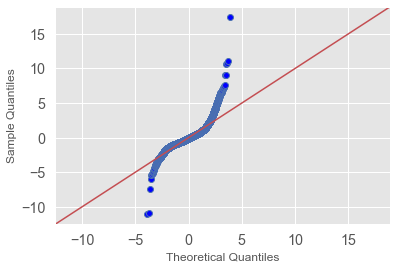

In [434]:
fig = sm.graphics.qqplot(model_b.resid, dist=stats.norm, line='45', fit=True)

### Check the Homoscedasticity Assumption

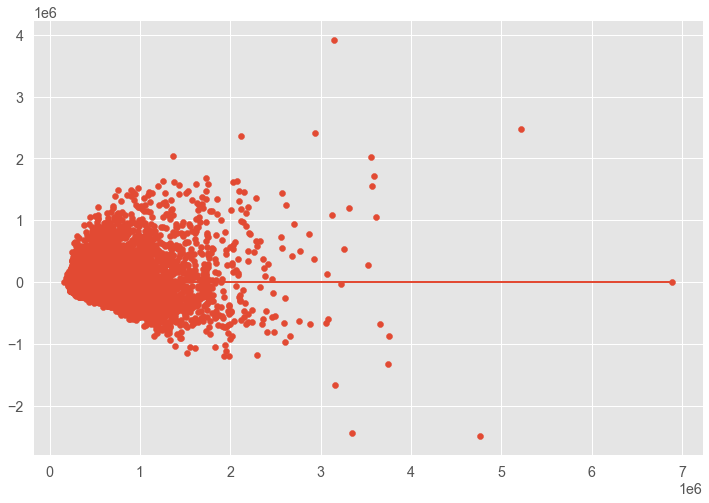

In [435]:
#Visualizing the errors
plt.figure(figsize=(12,8))
plt.scatter(model_b.predict(df_b[x_cols]), model_b.resid)
plt.plot(model_b.predict(df_b[x_cols]), [0 for i in range(len(df_b))])

## Add zip codes as variables to make a model

Add zipcodes to the dataframe with filtered p-value<0.05 columns

In [436]:
df_b.head()

,price,sqft_living,season_Spring,season_Summer,season_Winter,waterfront_1,condition_1,condition_2,condition_3,condition_4,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,221900.000,1180,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.000,2570,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,180000.000,770,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.000,1960,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,510000.000,1680,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [437]:
#One hot encode categoricals
zipcode_dummies = pd.get_dummies(df['zipcode'],prefix='zip',drop_first=True)

#columns with p-value smaller than 0.05 from model_b 
df_b

#add variable "price in df_c"
#df_price=df.loc[:,['price']]

#concatenate above 3 features as df_c
df_c= pd.concat([df_b,zipcode_dummies],axis =1)
df_c.head()

,price,sqft_living,season_Spring,season_Summer,season_Winter,waterfront_1,condition_1,condition_2,condition_3,condition_4,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.000,1180,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.000,2570,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.000,770,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.000,1960,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,510000.000,1680,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Fit the model with adding zip code.

In [438]:
outcome = 'price'
predictors_c = df_c.drop('price',axis = 1)
pred_sum_c='+'.join(predictors_c.columns)
formula = outcome + '~' + pred_sum_c
model_c= smf.ols(data = df_c, formula = formula).fit()

model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     863.3
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:33:27   Log-Likelihood:            -2.8771e+05
No. Observations:               21597   AIC:                         5.757e+05
Df Residuals:                   21467   BIC:                         5.767e+05
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2924.8227    1.7e+05      0.017      0.986    -3.3e+05    3.35e+05
sqft_living     152.5303      2.413     63.220      0.000     147.801     157.259
season_Spring  2.911e+04   2785.633     10.448      0.000    2.36e+04    3.46e+04
season_Summer  5708.4255   2804.220      2.036      0.042     211.945    1.12e+04
season_Winter  7300.2735   3219.265      2.268      0.023     990.275    1.36e+04
waterfront_1   6.033e+05   1.53e+04     39.329      0.000    5.73e+05    6.33e+05
condition_1    7.878e+04   2.99e+04      2.631      0.009    2.01e+04    1.37e+05
condition_2    8.444e+04   2.78e+04      3.032      0.002    2.99e+04    1.39e+05
condition_3    1.103e+05   2.79e+04      3.957      0.000    5.57e+04    1.65e+05
condition_4     1.59e+05    2.8e+04      5.670      0.000    1.04e+05    2.14e+05
view_1         9.163e+04   8404.098     10.903      0.000    7.52e+04    1.08e+05
view_2         7.274e+04   5101.746     14.258      0.000    6.27e+04    8.27e+04
view_3         1.528e+05   6950.514     21.981      0.000    1.39e+05    1.66e+05
view_4         2.878e+05   1.06e+04     27.181      0.000    2.67e+05    3.09e+05
bedroom_2        -9.7336   1.14e+04     -0.001      0.999   -2.24e+04    2.24e+04
bedroom_3      9736.3573   1.14e+04      0.852      0.394   -1.27e+04    3.21e+04
bedroom_4     -2558.0542   1.17e+04     -0.219      0.827   -2.54e+04    2.03e+04
bedroom_5     -2.115e+04   1.23e+04     -1.720      0.086   -4.53e+04    2957.469
bedroom_6     -5.263e+04    1.5e+04     -3.511      0.000    -8.2e+04   -2.32e+04
bedroom_7      -1.85e+05   2.75e+04     -6.733      0.000   -2.39e+05   -1.31e+05
bedroom_8     -7.315e+04   4.34e+04     -1.687      0.092   -1.58e+05    1.18e+04
bedroom_9     -1.517e+05   6.81e+04     -2.229      0.026   -2.85e+05   -1.83e+04
bedroom_10      -3.5e+05   8.77e+04     -3.991      0.000   -5.22e+05   -1.78e+05
bathroom_0_75  5096.9361   7.65e+04      0.067      0.947   -1.45e+05    1.55e+05
bathroom_1_0   3.986e+04   7.43e+04      0.537      0.591   -1.06e+05    1.85e+05
bathroom_1_25 -9.084e+04   8.92e+04     -1.018      0.309   -2.66e+05     8.4e+04
bathroom_1_5   2.083e+04   7.44e+04      0.280      0.779   -1.25e+05    1.67e+05
bathroom_1_75  1.801e+04   7.43e+04      0.242      0.809   -1.28e+05    1.64e+05
bathroom_2_0   1.939e+04   7.44e+04      0.261      0.794   -1.26e+05    1.65e+05
bathroom_2_25  2.436e+04   7.44e+04      0.328      0.743   -1.21e+05     1.7e+05
bathroom_2_5   1.416e+04   7.43e+04      0.190      0.849   -1.32e+05     1.6e+05
bathroom_2_75  1.554e+04   7.44e+04      0.209      0.835    -1.3e+05    1.61e+05
bathroom_3_0   3.433e+04   7.45e+04      0.461      0.645   -1.12e+05     1.8e+05
bathroom_3_25  6.815e+04   7.46e+04      0.913      0.361   -7.81e+04    2.14e+05
bathroom_3_5   2.397e+04   7.46e+04      0.321   

### Remove uninfluential features

In [440]:
summary_c = model_c.summary()
p_table = summary_c.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols= list(p_table[p_table['P>|t|'] < 0.05].index)
#x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
#print(x_cols[:5])
p_table.head()

130 86
['sqft_living', 'season_Spring', 'season_Summer', 'season_Winter', 'waterfront_1', 'condition_1', 'condition_2', 'condition_3', 'condition_4', 'view_1', 'view_2', 'view_3', 'view_4', 'bedroom_6', 'bedroom_7', 'bedroom_9', 'bedroom_10', 'bathroom_4_25', 'bathroom_4_75', 'bathroom_5_0', 'bathroom_5_25', 'bathroom_5_5', 'bathroom_5_75', 'bathroom_6_0', 'bathroom_6_25', 'bathroom_7_75', 'bathroom_8_0', 'grade_12', 'grade_13', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_981

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2924.8227,1.7e+05,0.017,0.986,-3.3e+05,3.35e+05
sqft_living,152.5303,2.413,63.220,0.000,147.801,157.259
season_Spring,2.911e+04,2785.633,10.448,0.000,2.36e+04,3.46e+04
season_Summer,5708.4255,2804.220,2.036,0.042,211.945,1.12e+04
season_Winter,7300.2735,3219.265,2.268,0.023,990.275,1.36e+04


In [441]:
outcome = 'price'
predictors='+'.join(x_cols)

formula = outcome + '~' + predictors
model_c = smf.ols(data = df_c, formula = formula).fit()

model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:34:16   Log-Likelihood:            -2.8934e+05
No. Observations:               21597   AIC:                         5.788e+05
Df Residuals:                   21510   BIC:                         5.795e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.116e+05      3e+04     -7.057      0.000    -2.7e+05   -1.53e+05
sqft_living     207.1810      1.488    139.259      0.000     204.265     210.097
season_Spring  3.039e+04   2997.131     10.140      0.000    2.45e+04    3.63e+04
season_Summer  6841.8281   3017.038      2.268      0.023     928.209    1.28e+04
season_Winter  7416.4933   3464.114      2.141      0.032     626.573    1.42e+04
waterfront_1   6.116e+05   1.63e+04     37.527      0.000     5.8e+05    6.44e+05
condition_1    7.923e+04   3.21e+04      2.465      0.014    1.62e+04    1.42e+05
condition_2    8.434e+04   2.98e+04      2.833      0.005     2.6e+04    1.43e+05
condition_3    9.383e+04   2.98e+04      3.147      0.002    3.54e+04    1.52e+05
condition_4    1.353e+05      3e+04      4.511      0.000    7.65e+04    1.94e+05
view_1         9.365e+04   9012.199     10.391      0.000     7.6e+04    1.11e+05
view_2         8.713e+04   5445.418     16.001      0.000    7.65e+04    9.78e+04
view_3         1.811e+05   7404.167     24.458      0.000    1.67e+05    1.96e+05
view_4         3.291e+05   1.13e+04     29.016      0.000    3.07e+05    3.51e+05
bedroom_6     -8.261e+04   9968.579     -8.287      0.000   -1.02e+05   -6.31e+04
bedroom_7     -2.028e+05   2.64e+04     -7.667      0.000   -2.55e+05   -1.51e+05
bedroom_9     -2.184e+05   6.55e+04     -3.334      0.001   -3.47e+05      -9e+04
bedroom_10    -4.723e+05   9.35e+04     -5.050      0.000   -6.56e+05   -2.89e+05
bathroom_4_25  1.908e+05   1.84e+04     10.389      0.000    1.55e+05    2.27e+05
bathroom_4_75  4.035e+05   3.38e+04     11.944      0.000    3.37e+05     4.7e+05
bathroom_5_0    2.27e+05   3.53e+04      6.434      0.000    1.58e+05    2.96e+05
bathroom_5_25  2.377e+05   4.54e+04      5.240      0.000    1.49e+05    3.27e+05
bathroom_5_5   3.983e+05    5.2e+04      7.657      0.000    2.96e+05       5e+05
bathroom_5_75  6.512e+04    8.2e+04      0.794      0.427   -9.57e+04    2.26e+05
bathroom_6_0     5.5e+05    6.7e+04      8.206      0.000    4.19e+05    6.81e+05
bathroom_6_25  4.378e+05   1.16e+05      3.776      0.000    2.11e+05    6.65e+05
bathroom_7_75  2.193e+06   1.69e+05     12.956      0.000    1.86e+06    2.53e+06
bathroom_8_0   1.055e+06   1.18e+05      8.949      0.000    8.24e+05    1.29e+06
grade_12         5.4e+05   1.83e+04     29.582      0.000    5.04e+05    5.76e+05
grade_13       1.258e+06   5.03e+04     24.998      0.000    1.16e+06    1.36e+06
zip_98004      8.119e+05   9499.010     85.473      0.000    7.93e+05    8.31e+05
zip_98005      3.451e+05   1.27e+04     27.198      0.000     3.2e+05     3.7e+05
zip_98006      2.872e+05   7814.643     36.754      0.000    2.72e+05    3.03e+05
zip_98007      2.784e+05   1.37e+04     20.246      0.000    2.51e+05    3.05e+05
zip_98008      2.604e+05   9895.844     26.316   

### Check Multicollinearity

In [442]:
X = df_c[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))


[('sqft_living', 9.680410400183979),
 ('season_Spring', 2.291674568313268),
 ('season_Summer', 2.2561642546075547),
 ('season_Winter', 1.7348991464733432),
 ('waterfront_1', 1.5230803717141332),
 ('condition_1', 1.1026170849537351),
 ('condition_2', 10.948795552600384),
 ('condition_3', 4.561683323350411),
 ('condition_4', 2.1843567771950028),
 ('view_1', 1.0528262081378656),
 ('view_2', 1.1146291090106921),
 ('view_3', 1.0938927870279325),
 ('view_4', 1.601421975898341),
 ('bedroom_6', 1.0617473637291268),
 ('bedroom_7', 1.0441753531062838),
 ('bedroom_9', 1.0112243877748828),
 ('bedroom_10', 1.0305056377503927),
 ('bathroom_4_25', 1.046071967637041),
 ('bathroom_4_75', 1.0310270142156235),
 ('bathroom_5_0', 1.0267341293416996),
 ('bathroom_5_25', 1.051038359910233),
 ('bathroom_5_5', 1.062863536422627),
 ('bathroom_5_75', 1.0575701638350825),
 ('bathroom_6_0', 1.0590215061759254),
 ('bathroom_6_25', 1.0565166118003855),
 ('bathroom_7_75', 1.1257890514326925),
 ('bathroom_8_0', 1.0907

Subset the features based on above findings.

In [443]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 40]
print(len(vif_scores), len(x_cols))
print(x_cols)


86 86
['sqft_living', 'season_Spring', 'season_Summer', 'season_Winter', 'waterfront_1', 'condition_1', 'condition_2', 'condition_3', 'condition_4', 'view_1', 'view_2', 'view_3', 'view_4', 'bedroom_6', 'bedroom_7', 'bedroom_9', 'bedroom_10', 'bathroom_4_25', 'bathroom_4_75', 'bathroom_5_0', 'bathroom_5_25', 'bathroom_5_5', 'bathroom_5_75', 'bathroom_6_0', 'bathroom_6_25', 'bathroom_7_75', 'bathroom_8_0', 'grade_12', 'grade_13', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_9811

In [444]:
outcome = 'price'
predictors='+'.join(x_cols)

formula = outcome + '~' + predictors
model_c = smf.ols(data = df_c, formula = formula).fit()

model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:34:52   Log-Likelihood:            -2.8934e+05
No. Observations:               21597   AIC:                         5.788e+05
Df Residuals:                   21510   BIC:                         5.795e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.116e+05      3e+04     -7.057      0.000    -2.7e+05   -1.53e+05
sqft_living     207.1810      1.488    139.259      0.000     204.265     210.097
season_Spring  3.039e+04   2997.131     10.140      0.000    2.45e+04    3.63e+04
season_Summer  6841.8281   3017.038      2.268      0.023     928.209    1.28e+04
season_Winter  7416.4933   3464.114      2.141      0.032     626.573    1.42e+04
waterfront_1   6.116e+05   1.63e+04     37.527      0.000     5.8e+05    6.44e+05
condition_1    7.923e+04   3.21e+04      2.465      0.014    1.62e+04    1.42e+05
condition_2    8.434e+04   2.98e+04      2.833      0.005     2.6e+04    1.43e+05
condition_3    9.383e+04   2.98e+04      3.147      0.002    3.54e+04    1.52e+05
condition_4    1.353e+05      3e+04      4.511      0.000    7.65e+04    1.94e+05
view_1         9.365e+04   9012.199     10.391      0.000     7.6e+04    1.11e+05
view_2         8.713e+04   5445.418     16.001      0.000    7.65e+04    9.78e+04
view_3         1.811e+05   7404.167     24.458      0.000    1.67e+05    1.96e+05
view_4         3.291e+05   1.13e+04     29.016      0.000    3.07e+05    3.51e+05
bedroom_6     -8.261e+04   9968.579     -8.287      0.000   -1.02e+05   -6.31e+04
bedroom_7     -2.028e+05   2.64e+04     -7.667      0.000   -2.55e+05   -1.51e+05
bedroom_9     -2.184e+05   6.55e+04     -3.334      0.001   -3.47e+05      -9e+04
bedroom_10    -4.723e+05   9.35e+04     -5.050      0.000   -6.56e+05   -2.89e+05
bathroom_4_25  1.908e+05   1.84e+04     10.389      0.000    1.55e+05    2.27e+05
bathroom_4_75  4.035e+05   3.38e+04     11.944      0.000    3.37e+05     4.7e+05
bathroom_5_0    2.27e+05   3.53e+04      6.434      0.000    1.58e+05    2.96e+05
bathroom_5_25  2.377e+05   4.54e+04      5.240      0.000    1.49e+05    3.27e+05
bathroom_5_5   3.983e+05    5.2e+04      7.657      0.000    2.96e+05       5e+05
bathroom_5_75  6.512e+04    8.2e+04      0.794      0.427   -9.57e+04    2.26e+05
bathroom_6_0     5.5e+05    6.7e+04      8.206      0.000    4.19e+05    6.81e+05
bathroom_6_25  4.378e+05   1.16e+05      3.776      0.000    2.11e+05    6.65e+05
bathroom_7_75  2.193e+06   1.69e+05     12.956      0.000    1.86e+06    2.53e+06
bathroom_8_0   1.055e+06   1.18e+05      8.949      0.000    8.24e+05    1.29e+06
grade_12         5.4e+05   1.83e+04     29.582      0.000    5.04e+05    5.76e+05
grade_13       1.258e+06   5.03e+04     24.998      0.000    1.16e+06    1.36e+06
zip_98004      8.119e+05   9499.010     85.473      0.000    7.93e+05    8.31e+05
zip_98005      3.451e+05   1.27e+04     27.198      0.000     3.2e+05     3.7e+05
zip_98006      2.872e+05   7814.643     36.754      0.000    2.72e+05    3.03e+05
zip_98007      2.784e+05   1.37e+04     20.246      0.000    2.51e+05    3.05e+05
zip_98008      2.604e+05   9895.844     26.316   

### Check Normality Assumption

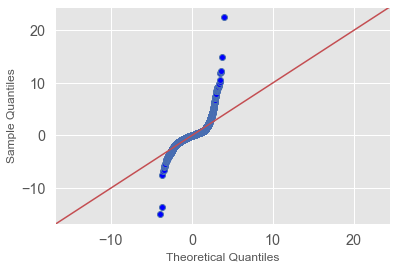

In [445]:
fig = sm.graphics.qqplot(model_c.resid, dist=stats.norm, line='45', fit=True)

### Check the Homoscedasticity Assumption

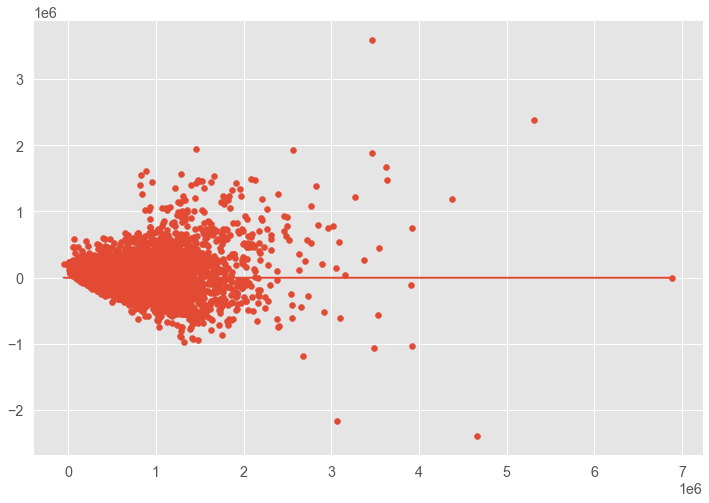

In [446]:
#Visualizing the errors

plt.figure(figsize=(12,8))

plt.scatter(model_c.predict(df_c[x_cols]), model_c.resid)
plt.plot(model_c.predict(df_c[x_cols]), [0 for i in range(len(df_c))])

Comment: Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

## Make Additional Refinements

Comment: Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

<AxesSubplot:>

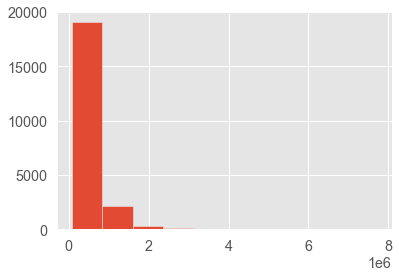

In [447]:
df['price'].hist()

In [448]:
for i in range(80,100):
    q = i/100
    #print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))
    print(f'percentile {(q,df.price.quantile(q=q))}')

percentile (0.8, 700435.9999999998)
percentile (0.81, 718000.0)
percentile (0.82, 730000.72)
percentile (0.83, 749950.0)
percentile (0.84, 760003.2)
percentile (0.85, 779721.9999999992)
percentile (0.86, 799000.0)
percentile (0.87, 815000.0)
percentile (0.88, 836739.9999999998)
percentile (0.89, 859967.6)
percentile (0.9, 887000.0)
percentile (0.91, 919993.6)
percentile (0.92, 950000.0)
percentile (0.93, 997964.0000000001)
percentile (0.94, 1060000.0)
percentile (0.95, 1160000.0)
percentile (0.96, 1260000.0)
percentile (0.97, 1390000.0)
percentile (0.98, 1600000.0)
percentile (0.99, 1970000.0)


In [449]:
orig_tot = len(df_c)
df_c = df_c[df_c.price <= 1600000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_c))/orig_tot)
df_c.price = df_c.price.map(np.log) # Applying a log transformation

Percent removed: 0.019724961800250036


In [450]:
# Refit model with subset features
outcome='price'
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1218.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:34:53   Log-Likelihood:                 3871.6
No. Observations:               21171   AIC:                            -7577.
Df Residuals:                   21088   BIC:                            -6916.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.5617      0.038    304.413      0.000      11.487      11.636
sqft_living       0.0003   1.97e-06    166.431      0.000       0.000       0.000
season_Spring     0.0507      0.004     13.230      0.000       0.043       0.058
season_Summer     0.0127      0.004      3.305      0.001       0.005       0.020
season_Winter     0.0136      0.004      3.071      0.002       0.005       0.022
waterfront_1      0.5148      0.026     19.556      0.000       0.463       0.566
condition_1       0.1700      0.041      4.177      0.000       0.090       0.250
condition_2       0.3311      0.038      8.786      0.000       0.257       0.405
condition_3       0.3478      0.038      9.215      0.000       0.274       0.422
condition_4       0.4010      0.038     10.559      0.000       0.327       0.475
view_1            0.1395      0.012     11.761      0.000       0.116       0.163
view_2            0.1391      0.007     19.688      0.000       0.125       0.153
view_3            0.2238      0.010     22.610      0.000       0.204       0.243
view_4            0.3072      0.016     18.988      0.000       0.276       0.339
bedroom_6        -0.1361      0.013    -10.410      0.000      -0.162      -0.111
bedroom_7        -0.2907      0.037     -7.922      0.000      -0.363      -0.219
bedroom_9        -0.3623      0.083     -4.368      0.000      -0.525      -0.200
bedroom_10       -0.4271      0.120     -3.567      0.000      -0.662      -0.192
bathroom_4_25    -0.0755      0.028     -2.649      0.008      -0.131      -0.020
bathroom_4_75    -0.1997      0.077     -2.601      0.009      -0.350      -0.049
bathroom_5_0     -0.0490      0.059     -0.835      0.404      -0.164       0.066
bathroom_5_25    -0.1289      0.079     -1.637      0.102      -0.283       0.025
bathroom_5_5     -0.2313      0.102     -2.271      0.023      -0.431      -0.032
bathroom_5_75    -0.1584      0.206     -0.770      0.442      -0.562       0.245
bathroom_6_0     -1.0294      0.148     -6.939      0.000      -1.320      -0.739
bathroom_6_25  3.122e-15   1.28e-15      2.432      0.015    6.05e-16    5.64e-15
bathroom_7_75  2.375e-15   6.69e-16      3.551      0.000    1.06e-15    3.69e-15
bathroom_8_0  -1.433e-15   5.88e-16     -2.440      0.015   -2.59e-15   -2.82e-16
grade_12          0.0511      0.039      1.315      0.189      -0.025       0.127
grade_13      -1.826e-15   4.29e-16     -4.258      0.000   -2.67e-15   -9.86e-16
zip_98004         1.0946      0.014     78.592      0.000       1.067       1.122
zip_98005         0.7515      0.016     46.148      0.000       0.720       0.783
zip_98006         0.6347      0.010     62.533      0.000       0.615       0.655
zip_98007         0.6530      0.017     37.519      0.000       0.619       0.687
zip_98008         0.6040      0.013     47.696   

### Check the Normality Assumption

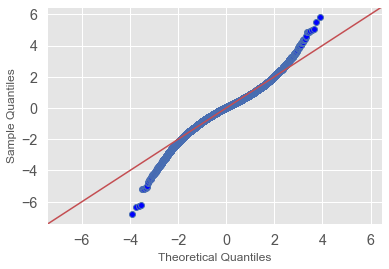

In [451]:
fig = sm.graphics.qqplot(model.resid,dist = stats.norm, line='45',fit=True)

### Check the Homoscedasticity

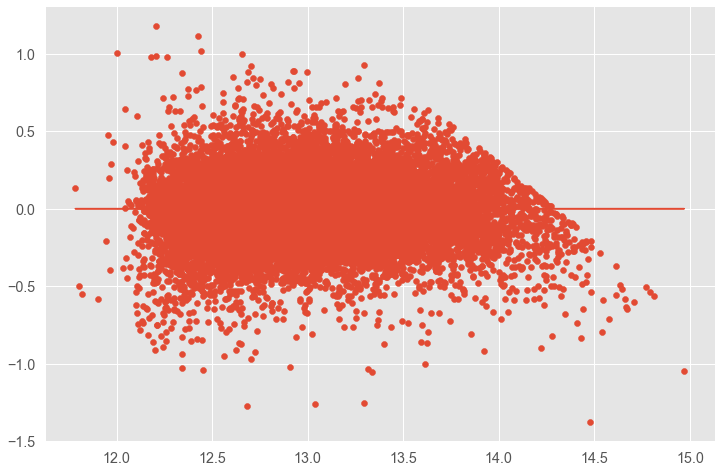

In [452]:
#Visualizing the errors

plt.figure(figsize=(12,8))

plt.scatter(model.predict(df_c[x_cols]), model.resid)
plt.plot(model.predict(df_c[x_cols]), [0 for i in range(len(df_c))])

### Refine the model once again

percentile (0.8, 13.432784936825598)
percentile (0.81, 13.45597438174451)
percentile (0.82, 13.473020249017498)
percentile (0.83, 13.493671726933949)
percentile (0.84, 13.51156355630531)
percentile (0.85, 13.527828485512494)
percentile (0.86, 13.550255105837401)
percentile (0.87, 13.569610019527449)
percentile (0.88, 13.592367006650065)
percentile (0.89, 13.617059619240436)
percentile (0.9, 13.641752231830807)
percentile (0.91, 13.670484785914017)
percentile (0.92, 13.704176627732581)
percentile (0.93, 13.736575517210897)
percentile (0.94, 13.77455313565391)
percentile (0.95, 13.815510557964274)
percentile (0.96, 13.892471599100402)
percentile (0.97, 13.972514306773938)
percentile (0.98, 14.054527458434775)
percentile (0.99, 14.151982794585487)


<AxesSubplot:>

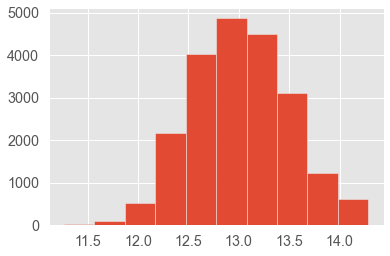

In [453]:
for i in range(80,100):
    q = i/100
    print(f'percentile {(q,df_c.price.quantile(q=q))}')
df_c.price.hist()

In [454]:
df_c = df_c[df_c.price <= 14.15]


# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1142.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:34:54   Log-Likelihood:                 3963.5
No. Observations:               20951   AIC:                            -7761.
Df Residuals:                   20868   BIC:                            -7101.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.5341      0.038    300.318      0.000      11.459      11.609
sqft_living       0.0003      2e-06    163.050      0.000       0.000       0.000
season_Spring     0.0501      0.004     13.080      0.000       0.043       0.058
season_Summer     0.0132      0.004      3.418      0.001       0.006       0.021
season_Winter     0.0131      0.004      2.961      0.003       0.004       0.022
waterfront_1      0.5015      0.027     18.265      0.000       0.448       0.555
condition_1       0.2023      0.041      4.926      0.000       0.122       0.283
condition_2       0.3629      0.038      9.521      0.000       0.288       0.438
condition_3       0.3798      0.038      9.951      0.000       0.305       0.455
condition_4       0.4337      0.038     11.293      0.000       0.358       0.509
view_1            0.1404      0.012     11.766      0.000       0.117       0.164
view_2            0.1372      0.007     19.269      0.000       0.123       0.151
view_3            0.2212      0.010     21.652      0.000       0.201       0.241
view_4            0.3007      0.017     17.971      0.000       0.268       0.333
bedroom_6        -0.1357      0.013    -10.315      0.000      -0.161      -0.110
bedroom_7        -0.2802      0.037     -7.648      0.000      -0.352      -0.208
bedroom_9        -0.3823      0.090     -4.241      0.000      -0.559      -0.206
bedroom_10       -0.4064      0.120     -3.400      0.001      -0.641      -0.172
bathroom_4_25    -0.0997      0.032     -3.106      0.002      -0.163      -0.037
bathroom_4_75    -0.1945      0.076     -2.548      0.011      -0.344      -0.045
bathroom_5_0     -0.0333      0.064     -0.522      0.601      -0.158       0.092
bathroom_5_25    -0.1521      0.085     -1.795      0.073      -0.318       0.014
bathroom_5_5     -0.3737      0.143     -2.606      0.009      -0.655      -0.093
bathroom_5_75    -0.1654      0.205     -0.809      0.419      -0.566       0.235
bathroom_6_0     -1.4905      0.210     -7.084      0.000      -1.903      -1.078
bathroom_6_25  4.911e-15   9.21e-16      5.331      0.000    3.11e-15    6.72e-15
bathroom_7_75 -3.591e-16   2.45e-16     -1.468      0.142   -8.39e-16     1.2e-16
bathroom_8_0   1.358e-15   3.96e-16      3.430      0.001    5.82e-16    2.13e-15
grade_12          0.0309      0.061      0.508      0.612      -0.088       0.150
grade_13      -1.768e-16    4.6e-16     -0.384      0.701   -1.08e-15    7.25e-16
zip_98004         1.0728      0.015     71.692      0.000       1.043       1.102
zip_98005         0.7522      0.016     46.350      0.000       0.720       0.784
zip_98006         0.6374      0.010     62.388      0.000       0.617       0.657
zip_98007         0.6529      0.017     37.747      0.000       0.619       0.687
zip_98008         0.6037      0.013     47.713   

In [455]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols= list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
#print(x_cols[:5])
p_table.head()

87 80
['sqft_living', 'season_Spring', 'season_Summer', 'season_Winter', 'waterfront_1', 'condition_1', 'condition_2', 'condition_3', 'condition_4', 'view_1', 'view_2', 'view_3', 'view_4', 'bedroom_6', 'bedroom_7', 'bedroom_9', 'bedroom_10', 'bathroom_4_25', 'bathroom_4_75', 'bathroom_5_5', 'bathroom_6_0', 'bathroom_6_25', 'bathroom_8_0', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_9814

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,11.5341,0.038,300.318,0.000,11.459,11.609
sqft_living,0.0003,2e-06,163.050,0.000,0.000,0.000
season_Spring,0.0501,0.004,13.080,0.000,0.043,0.058
season_Summer,0.0132,0.004,3.418,0.001,0.006,0.021
season_Winter,0.0131,0.004,2.961,0.003,0.004,0.022


Refit the model with subset features.

In [456]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1201.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:34:54   Log-Likelihood:                 3961.3
No. Observations:               20951   AIC:                            -7765.
Df Residuals:                   20872   BIC:                            -7137.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.5343      0.038    300.323      0.000      11.459      11.610
sqft_living       0.0003   1.99e-06    163.416      0.000       0.000       0.000
season_Spring     0.0501      0.004     13.083      0.000       0.043       0.058
season_Summer     0.0132      0.004      3.425      0.001       0.006       0.021
season_Winter     0.0131      0.004      2.970      0.003       0.004       0.022
waterfront_1      0.5013      0.027     18.260      0.000       0.448       0.555
condition_1       0.2023      0.041      4.926      0.000       0.122       0.283
condition_2       0.3629      0.038      9.521      0.000       0.288       0.438
condition_3       0.3799      0.038      9.953      0.000       0.305       0.455
condition_4       0.4338      0.038     11.295      0.000       0.359       0.509
view_1            0.1399      0.012     11.746      0.000       0.117       0.163
view_2            0.1371      0.007     19.260      0.000       0.123       0.151
view_3            0.2215      0.010     21.697      0.000       0.202       0.242
view_4            0.3009      0.017     17.984      0.000       0.268       0.334
bedroom_6        -0.1380      0.013    -10.549      0.000      -0.164      -0.112
bedroom_7        -0.2853      0.036     -7.913      0.000      -0.356      -0.215
bedroom_9        -0.3822      0.090     -4.240      0.000      -0.559      -0.206
bedroom_10       -0.4570      0.116     -3.934      0.000      -0.685      -0.229
bathroom_4_25    -0.0982      0.032     -3.062      0.002      -0.161      -0.035
bathroom_4_75    -0.1935      0.076     -2.536      0.011      -0.343      -0.044
bathroom_5_5     -0.3709      0.143     -2.587      0.010      -0.652      -0.090
bathroom_6_0     -1.4597      0.202     -7.237      0.000      -1.855      -1.064
bathroom_6_25  4.717e-17   4.87e-16      0.097      0.923   -9.08e-16       1e-15
bathroom_8_0   2.376e-15    3.1e-16      7.667      0.000    1.77e-15    2.98e-15
zip_98004         1.0723      0.015     71.674      0.000       1.043       1.102
zip_98005         0.7522      0.016     46.356      0.000       0.720       0.784
zip_98006         0.6380      0.010     62.564      0.000       0.618       0.658
zip_98007         0.6532      0.017     37.766      0.000       0.619       0.687
zip_98008         0.6038      0.013     47.726      0.000       0.579       0.629
zip_98010         0.2165      0.020     10.628      0.000       0.177       0.256
zip_98011         0.4187      0.015     28.262      0.000       0.390       0.448
zip_98014         0.2769      0.019     14.899      0.000       0.240       0.313
zip_98019         0.2869      0.015     19.115      0.000       0.257       0.316
zip_98023        -0.0688      0.010     -7.139      0.000      -0.088      -0.050
zip_98024         0.3982      0.024     16.767   

### Check the Normality Assumption

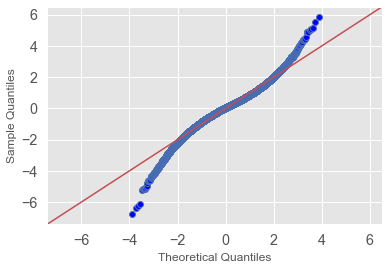

In [457]:
fig=sm.graphics.qqplot(model.resid,dist=stats.norm, line='45',fit=True)

### Check Homoscedasticity

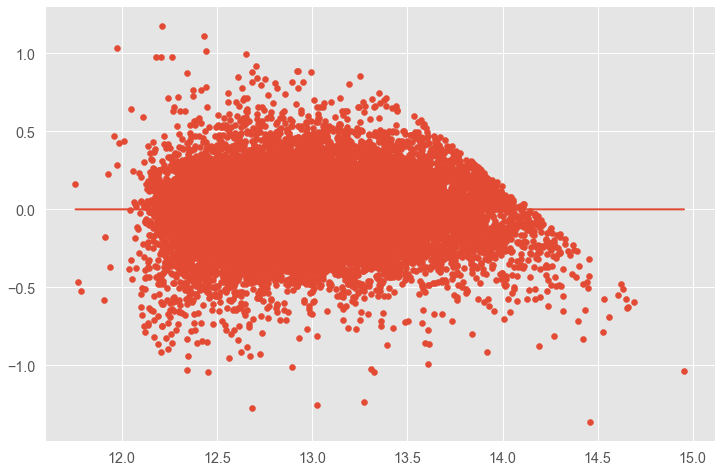

In [458]:
#Visualizing the errors

plt.figure(figsize=(12,8))

plt.scatter(model.predict(df_c[x_cols]), model.resid)
plt.plot(model.predict(df_c[x_cols]), [0 for i in range(len(df_c))])

## Feature ranking with recursive feature elimination

In [459]:
y = df_c[['price']]
X = df_c.drop(['price'],axis = 1)

In [460]:
#best performing features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=82)
selector = selector.fit(X, y)

feature_xcols= X.columns.values[selector.support_]
feature_xcols

array(['waterfront_1', 'condition_2', 'condition_3', 'condition_4',
       'view_1', 'view_2', 'view_3', 'view_4', 'bedroom_9',
       'bathroom_3_5', 'bathroom_3_75', 'bathroom_4_0', 'bathroom_4_25',
       'bathroom_4_5', 'bathroom_4_75', 'bathroom_5_0', 'bathroom_5_25',
       'bathroom_5_5', 'bathroom_6_0', 'bathroom_6_5', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98056', 'zip_98058', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106',
       'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115',
       'zi

In [461]:
# Refit model with subset features
predictors = '+'.join(feature_xcols)
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     866.3
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:34:57   Log-Likelihood:                 1657.7
No. Observations:               20951   AIC:                            -3149.
Df Residuals:                   20868   BIC:                            -2490.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.5054      0.017    743.599      0.000      12.472      12.538
waterfront_1      0.3638      0.031     11.631      0.000       0.303       0.425
condition_2       0.1391      0.016      8.516      0.000       0.107       0.171
condition_3       0.1953      0.016     11.876      0.000       0.163       0.228
condition_4       0.2878      0.017     16.828      0.000       0.254       0.321
view_1            0.1837      0.013     13.812      0.000       0.158       0.210
view_2            0.1761      0.008     22.207      0.000       0.161       0.192
view_3            0.2602      0.011     22.811      0.000       0.238       0.283
view_4            0.3554      0.019     19.025      0.000       0.319       0.392
bedroom_9         0.2653      0.101      2.621      0.009       0.067       0.464
bathroom_3_5      0.1247      0.009     13.183      0.000       0.106       0.143
bathroom_3_75     0.2072      0.022      9.635      0.000       0.165       0.249
bathroom_4_0      0.1548      0.023      6.588      0.000       0.109       0.201
bathroom_4_25     0.2328      0.036      6.510      0.000       0.163       0.303
bathroom_4_5      0.1610      0.029      5.600      0.000       0.105       0.217
bathroom_4_75     0.2865      0.085      3.367      0.001       0.120       0.453
bathroom_5_0      0.3032      0.071      4.266      0.000       0.164       0.443
bathroom_5_25     0.2224      0.092      2.419      0.016       0.042       0.403
bathroom_5_5      0.1410      0.159      0.888      0.375      -0.170       0.452
bathroom_6_0     -0.5137      0.235     -2.187      0.029      -0.974      -0.053
bathroom_6_5      0.1819      0.225      0.809      0.419      -0.259       0.623
grade_4          -0.7409      0.043    -17.045      0.000      -0.826      -0.656
grade_5          -0.6139      0.015    -40.995      0.000      -0.643      -0.585
grade_6          -0.4408      0.006    -72.416      0.000      -0.453      -0.429
grade_7          -0.2121      0.004    -54.407      0.000      -0.220      -0.204
grade_9           0.2512      0.005     45.823      0.000       0.240       0.262
grade_10          0.3968      0.008     46.815      0.000       0.380       0.413
grade_11          0.5544      0.016     35.046      0.000       0.523       0.585
grade_12          0.6149      0.068      9.030      0.000       0.481       0.748
zip_98004         1.0398      0.017     62.545      0.000       1.007       1.072
zip_98005         0.7396      0.018     40.914      0.000       0.704       0.775
zip_98006         0.6091      0.011     53.604      0.000       0.587       0.631
zip_98007         0.5995      0.019     31.161      0.000       0.562       0.637
zip_98008         0.5952      0.014     42.439      0.000       0.568       0.623
zip_98010         0.2830      0.023     12.473   

## Regression Model Validation

In [462]:
y = df_c[['price']]
X = df_c.drop(['price'],axis = 1)

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 42)

In [464]:
print(len(X_train), len(X_test),len(y_train),len(y_test))

16760 4191 16760 4191


In [465]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_hat_train =linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [466]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [467]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train,y_hat_train)
test_mse = mean_squared_error(y_test,y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0336174187740566
Test Mean Squarred Error: 0.03597857691853406


From above, there doesn't seem to be a big difference between the train and test MSE. So there is no overfitting or underfitting of the model.

Text(0.5, 0, 'Predicted Y')

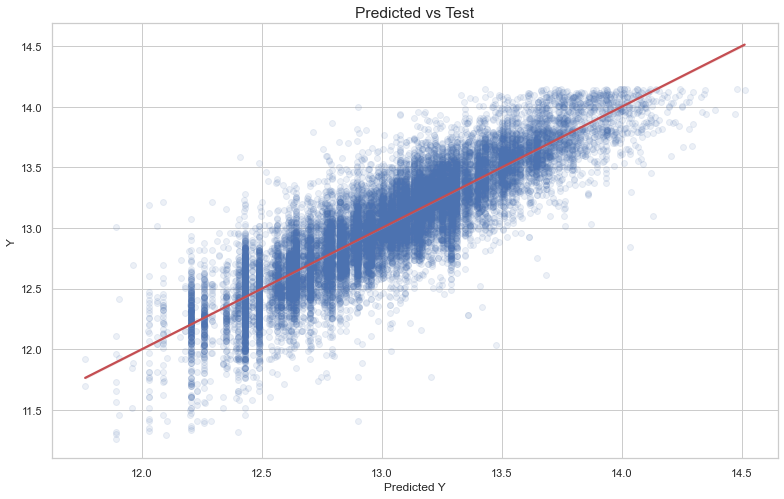

In [468]:
#plotting the predicted vs. test

test_pred = model.predict(X)
residuals_test = y- test_pred

plt.figure(figsize = (13,8))

sns.set(style = "whitegrid")

sns.regplot(test_pred, y, scatter_kws = {'color':'b','alpha':0.1},color='r')
sns.set(font_scale = 1.3)
plt.title('Predicted vs Test')
plt.ylabel('Y')
plt.xlabel('Predicted Y')

With Recursive Feature Elimination, 80 features is chosen and the final model accounts for 74 % of the house prices.

The final model's mean squared values for test and train sets indicates that the final model is not ovetfitting or underfitting.

# Conclusion

## Recommendations

- Grade, living space, condition, bathroom impact the housing prices greatly
- Where the house is located determines the price

## Next Step

- In order to provide more thorough analysis and suggestion, some more features could be explored further, like school district, crime statistics, household income, and distance to public transportation
- Mortgage interest rates and inventory on the market also impact housing prices
- More concrete insights can be established with a longer period of housing price history